In [ ]:
from seeg_action.project_config import ProjectConfig as cfg
import mne

In [2]:
subject = 'PriviteraM'
cfg.init_current_subject(subject)

In [3]:
epochs = mne.read_epochs(cfg.bipolar_ref_epochs_file)

Reading /Users/senaer/Codes/CCNLab/sEEG-action-classes/data/subjects/PetriceanuC/derivatives/PetriceanuC-epo.fif.gz ...
    Found the data of interest:
        t =    -500.00 ...    2600.00 ms
        0 CTF compensation matrices available
Not setting metadata
576 matching events found
No baseline correction applied
0 projection items activated


In [4]:
pos = epochs.get_montage().get_positions()['ch_pos']

In [5]:
from nilearn import plotting, image, datasets

In [6]:
import nibabel as nib

In [7]:
img_t1 = nib.load(cfg.T1_file)
img_seeg = nib.load(cfg.subject_path / 'RF_ref_plus_seeg.nii')

In [8]:
head_mri_t = mne.read_trans(cfg.subject_head_mri_t)

In [10]:
display = plotting.plot_anat(img_t1, title="P'16",
                        cut_coords=pos_mri)

display.add_markers([pos_mri], marker_color='y', marker_size=20)

NameError: name 'pos_mri' is not defined

In [11]:
dataset_ju = datasets.fetch_atlas_juelich('maxprob-thr0-1mm')

In [12]:
def find_region_names_using_cut_coords(coords, atlas_img, labels=None):
    import collections

    import numpy as np
    # import pandas as pd

    # from sklearn.datasets.base import Bunch

    from nilearn.image.resampling import coord_transform

    # from nilearn._utils.compat import _basestring
    from nilearn._utils import check_niimg
    from nilearn._utils.niimg import _safe_get_data
    """Given list of MNI space coordinates, get names of the brain regions.
    Names of the brain regions are returned by getting nearest coordinates
    in the given `atlas_img` space iterated over the provided list of
    `coords`. These new image coordinates are then used to grab the label
    number (int) and name assigned to it. Last, these names are returned.
    Parameters
    ----------
    coords : Tuples of coordinates in a list
        MNI coordinates.
    atlas_img : Nifti-like image
        Path to or Nifti-like object. The labels (integers) ordered in
        this image should be sequential. Example: [0, 1, 2, 3, 4] but not
        [0, 5, 6, 7]. Helps in returning correct names without errors.
    labels : str in a list
        Names of the brain regions assigned to each label in atlas_img.
        NOTE: label with index 0 is assumed as background. Example:
            harvard oxford atlas. Hence be removed.
    Returns
    -------
    new_labels : int in a list
        Labels in integers generated according to correspondence with
        given atlas image and provided coordinates.
    names : str in a list
        Names of the brain regions generated according to given inputs.
    """


    affine = atlas_img.affine
    atlas_data = _safe_get_data(atlas_img, ensure_finite=True)
    check_labels_from_atlas = np.unique(atlas_data)



    coords = list(coords)
    nearest_coordinates = []

    for sx, sy, sz in coords:
        nearest = np.round(coord_transform(sx, sy, sz, np.linalg.inv(affine)))
        nearest = nearest.astype(int)
        nearest = (nearest[0], nearest[1], nearest[2])
        nearest_coordinates.append(nearest)

    assert(len(nearest_coordinates) == len(coords))

    new_labels = []
    names = []
    for coord_ in nearest_coordinates:
        # Grab index of current coordinate
        index = atlas_data[coord_]
        new_labels.append(index)
        if labels is not None:
            names.append(labels[index])

    return new_labels, names


In [13]:
channels = ["E'5-E'6", "E'12-E'13", "E12-E13", "U'2-U'3", "U'7-U'8", "V'6-V'7", "V'7-V'8" ]

In [14]:
pos_mni = [mne.head_to_mni(pos[ch], cfg.current_subject, head_mri_t) for ch in channels]

In [15]:
pos_mni

[array([-51.2281138 , -18.83015867,  48.22689497]),
 array([-54.61798503, -18.98150878,  49.36297258]),
 array([-22.71943075, -18.72467679,  39.38475577]),
 array([-26.56906978, -18.94049368,  40.49905891]),
 array([50.7163188 , 31.74475656,  5.4017422 ]),
 array([54.43089394, 30.75195479,  6.35364757]),
 array([-1.9524735 ,  5.15240396, 47.08786604]),
 array([-5.37481533,  5.10027454, 50.08745663]),
 array([29.01875732,  0.11321232, 39.83161355]),
 array([32.72555281,  0.23360474, 40.79254594]),
 array([36.24577406,  0.14912058, 41.38055594]),
 array([17.96446505, 21.63677023, 50.62319453]),
 array([21.80542013, 23.38629303, 53.20755265])]

In [16]:
find_region_names_using_cut_coords(pos_mni, dataset_ju.maps, dataset_ju.labels)

([33, 33, 56, 56, 8, 8, 27, 27, 27, 27, 27, 0, 27],
 ['GM Primary somatosensory cortex BA1',
  'GM Primary somatosensory cortex BA1',
  'WM Corticospinal tract',
  'WM Corticospinal tract',
  "GM Broca's area BA45",
  "GM Broca's area BA45",
  'GM Premotor cortex BA6',
  'GM Premotor cortex BA6',
  'GM Premotor cortex BA6',
  'GM Premotor cortex BA6',
  'GM Premotor cortex BA6',
  'Background',
  'GM Premotor cortex BA6'])

In [98]:
coords, labels_list = plotting.find_parcellation_cut_coords(
    dataset_ju.maps,
    return_label_names=True,
)

In [17]:
from nilearn.image import math_img

In [18]:
import numpy as np

In [19]:
data = dataset_ju.maps.get_fdata()
label_roi_dict = {}
for label, roi_idx in zip(dataset_ju.labels, np.unique(data)):
    label_roi_dict[label] = int(roi_idx)

In [20]:
roi = math_img("np.where(np.isin(img, [33, 8, 27]), img, 0)", img=dataset_ju.maps)

In [218]:
img = dataset_ju.maps.get_fdata()
new_img = np.where(np.isin(img, [33, 8, 27]), img, 0)

In [219]:
np.unique(new_img)

array([ 0.,  8., 27., 33.])

/Users/senaer/mambaforge/envs/seeg-action/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/Users/senaer/mambaforge/envs/seeg-action/lib/python3.10/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


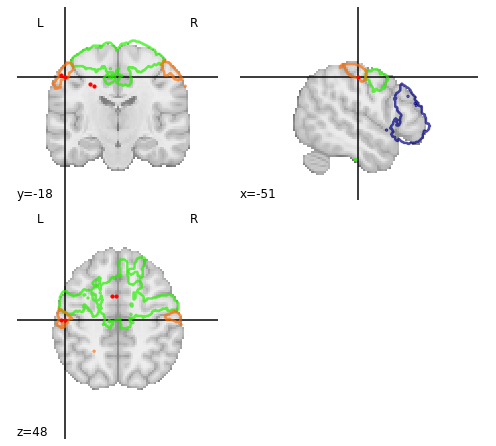

In [21]:
display = plotting.plot_roi(
    roi,
    display_mode='tiled',
    cut_coords=pos_mni[0],
    alpha=0.7,
    colorbar=True,
    view_type='contours',
)
display.add_markers(pos_mni, marker_color='r', marker_size=10, alpha=1)

In [226]:
mne.datasets.fetch_hcp_mmp_parcellation(cfg.patients_path, combine=True)

In [ ]:
display = plotting.plot_roi(
    roi,
    cut_coords=pos_mni[0],
    alpha=0.3,
    colorbar=True,
    # resampling_interpolation='continuous'
)
display.add_markers(pos_mni, marker_color='r', marker_size=10, alpha=1)

In [95]:
from nilearn.maskers import NiftiLabelsMasker

In [96]:
# Instantiate the masker with label image and label values
masker = NiftiLabelsMasker(dataset_ju.maps,
                           labels=dataset_ju.labels,
                           standardize=True)


/Users/senaer/mambaforge/envs/seeg-action/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:305: UserWarning: No image provided to fit in NiftiLabelsMasker. Plotting ROIs of label image on the MNI152Template for reporting.
  warnings.warn(msg)


label value,region name,size (in mm^3),relative size (in %)
1,GM Amygdala_centromedial group,1463,0.13
2,GM Amygdala_laterobasal group,6591,0.6
3,GM Amygdala_superficial group,4812,0.44
4,GM Anterior intra-parietal sulcus hIP1,15149,1.38
5,GM Anterior intra-parietal sulcus hIP2,4592,0.42
6,GM Anterior intra-parietal sulcus hIP3,10401,0.95
7,GM Broca's area BA44,45425,4.14
8,GM Broca's area BA45,43491,3.97
9,GM Hippocampus cornu ammonis,14616,1.33
10,GM Hippocampus dentate gyrus,1697,0.15


In [154]:
image.threshold_img(dataset_ju.maps)

In [184]:
masker.mask_img_

In [ ]:
# Visualize the atlas
# Note that we need to call fit prior to generating the mask
masker.fit()

In [ ]:
# At this point, no functional image has been provided to the masker.
# We can still generate a report which can be displayed in a Jupyter
# Notebook, opened in a browser using the .open_in_browser() method,
# or saved to a file using the .save_as_html(output_filepath) method.
report = masker.generate_report()
report